# Praca domowa nr 4 - raport

### Wojciech Celej

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (18,12)
plt.style.use("seaborn-whitegrid")
sns.set_context("notebook", font_scale=1.2)

---

## 1. Odczytanie danych z zapisanego pliku `csv`

In [3]:
results = pd.read_csv("results.csv")

Algorytmy, które zostaną zbadane:
* algorytm spektralny (włsana implementacja)
* algorytmy hierarchiczne z pakietu `scipy.cluster.hierarchy.linkage`
* algorytm *Genie* z pakietu `genieclust`
* 3 algorytmy pochodzące z `sklearn.cluster`: 

Tabela `results` jest typu `DataFrame`, gdzie każdy jej wiersz zawiera:
* nazwę zbioru
* nazwę użytego algorytmu  
oraz wartości:
* indeksu Fowlkesa-Mallowsa (FM): `sklearn.metrics.fowlkes_mallows_score()`
* indeksu AM: `sklearn.metrics.adjusted_mutual_info_score()`
* skorygowanego indeksu Randa (AR): `sklearn.metrics.adjusted_rand_score()`  
* analogiczne 3 wartości indeksów dla zmiennych ustandaryzowanych.

---

## 2. Ranking algorytmów

In [4]:
q1 = results.groupby("algorithm").mean().reset_index()

In [5]:
q1

,algorithm,FM,AM,AR,FM_std,AM_std,AR_std
0,AffProp_damp_0.7,0.503272,0.554127,0.344215,0.502376,0.561754,0.341692
1,AffProp_damp_0.9,0.521283,0.570024,0.363265,0.517412,0.567468,0.359716
2,Birch_thresh_0.2,0.717958,0.579263,0.509245,0.720955,0.590958,0.517042
3,Birch_thresh_0.3,0.719323,0.580409,0.507643,0.710661,0.571155,0.493928
4,Birch_thresh_0.4,0.724780,0.579538,0.511748,0.700996,0.585756,0.494143
5,KMeans,0.736327,0.605413,0.556211,0.731260,0.599500,0.548665
6,genieclust_tresh_0.2,0.839805,0.803799,0.756455,0.832888,0.797253,0.746231
7,genieclust_tresh_0.3,0.837756,0.812289,0.760214,0.830021,0.806844,0.749159
8,genieclust_tresh_0.4,0.836474,0.808961,0.755341,0.835476,0.799103,0.746773
9,genieclust_tresh_0.5,0.827417,0.799024,0.736180,0.825057,0.790125,0.725206


Wykresy poniżej prezentują ranking algorytmów, względem uśrednionych indeksów po wszystkich zbiorach danych. Ostatnie 3 wykresy (mające w tytule `<nazwa_indeksu>_std`) zostały utworzone w oparciu o zbiory danych ustandaryzowanych.

In [6]:
indexes = list(q1.columns[1:])

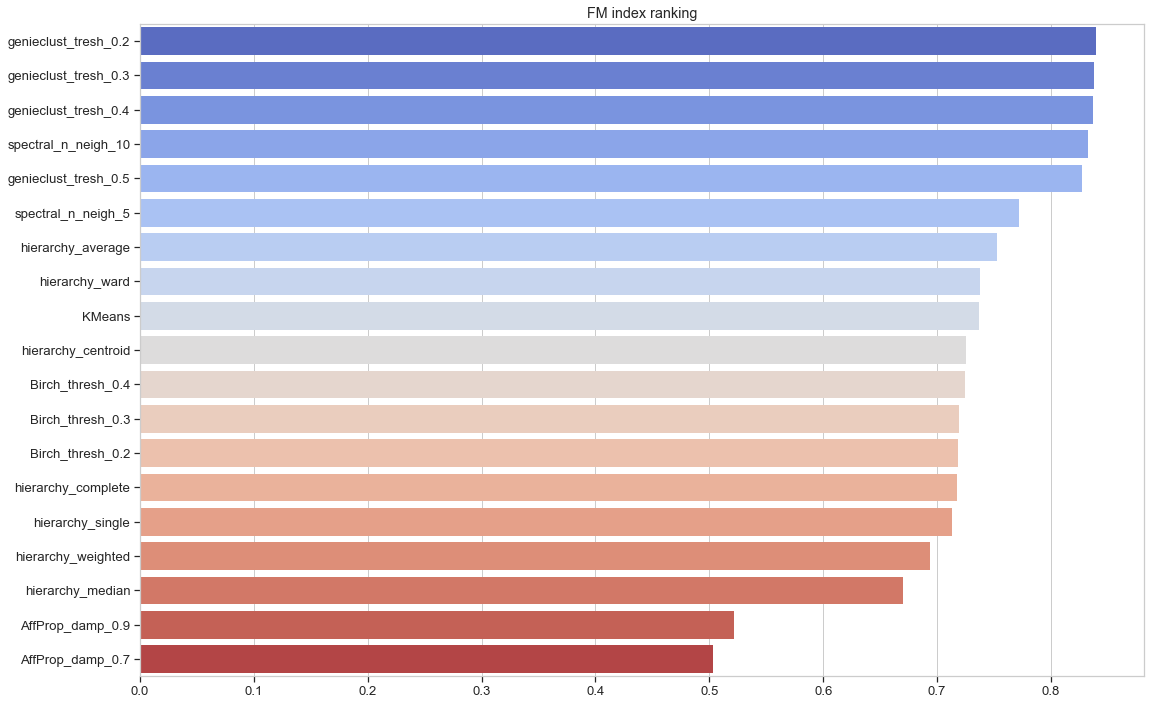

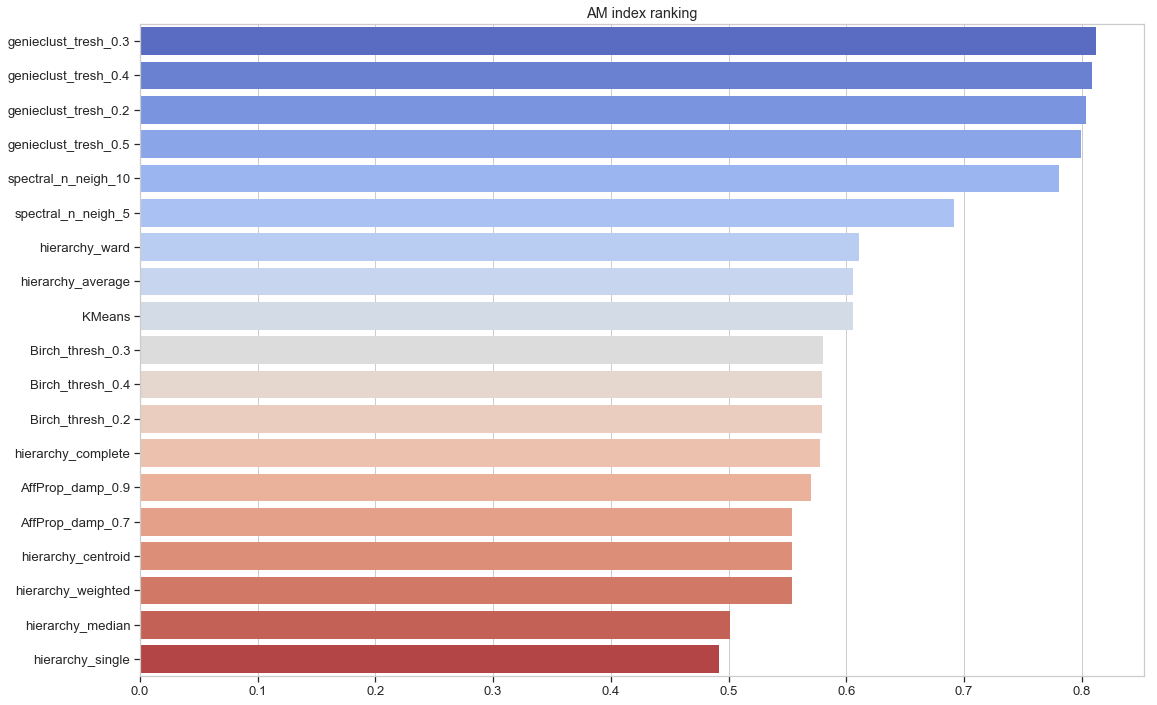

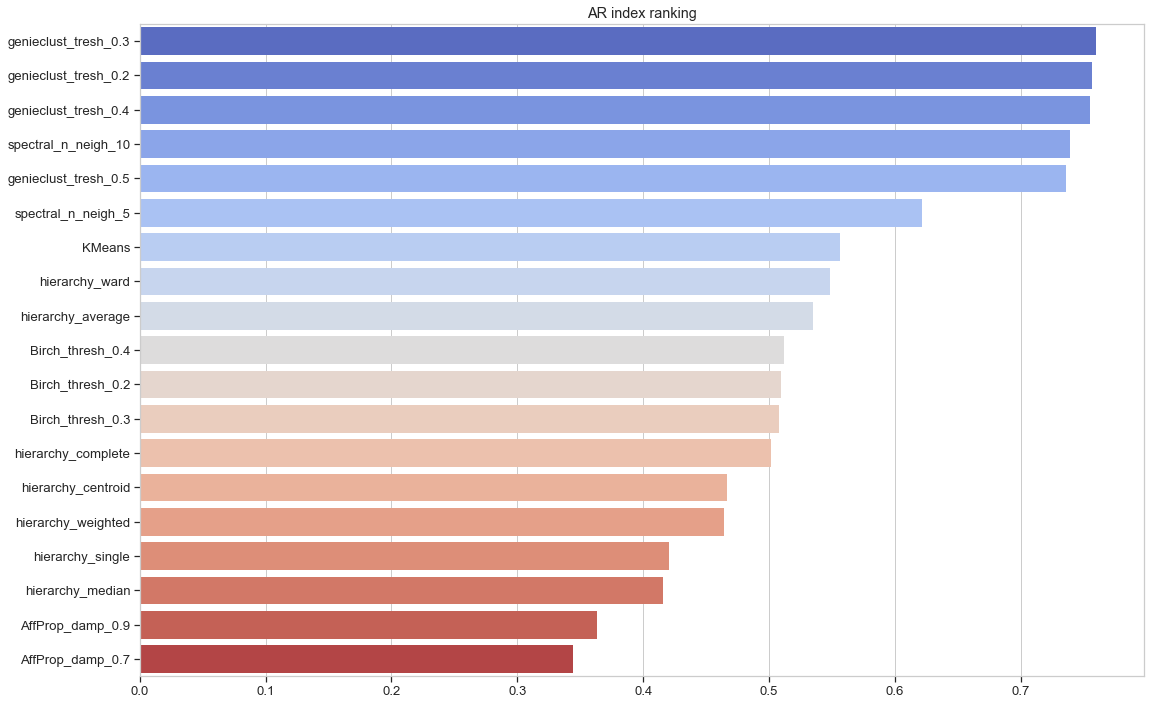

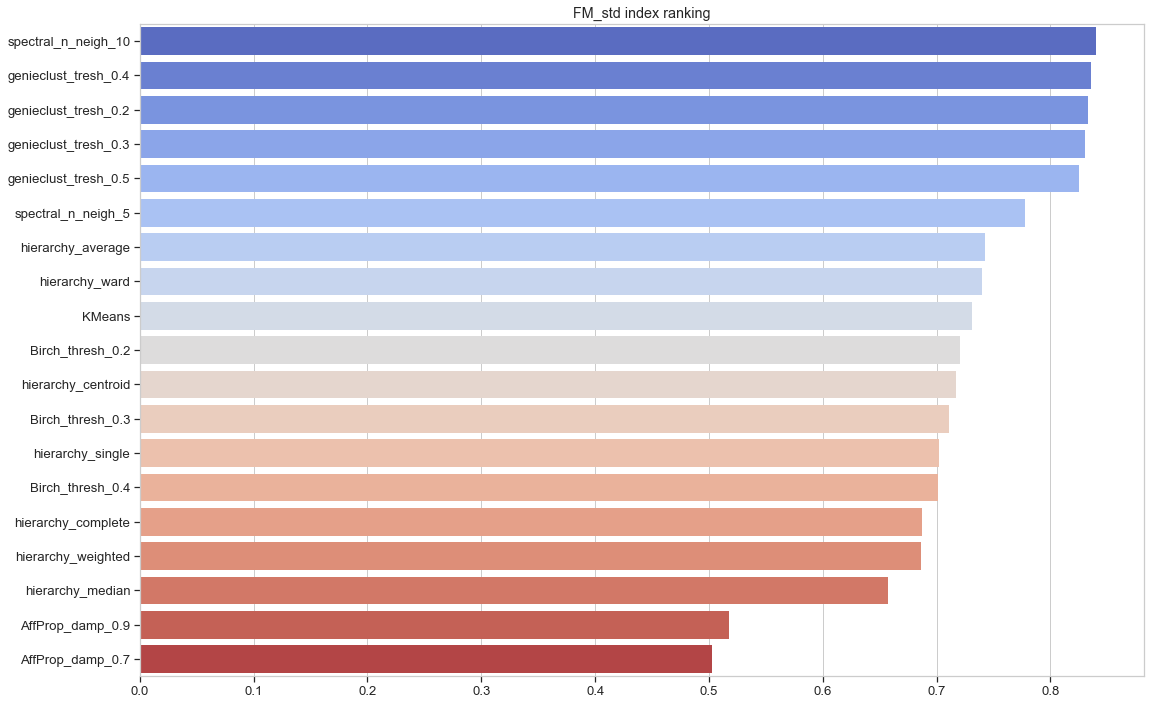

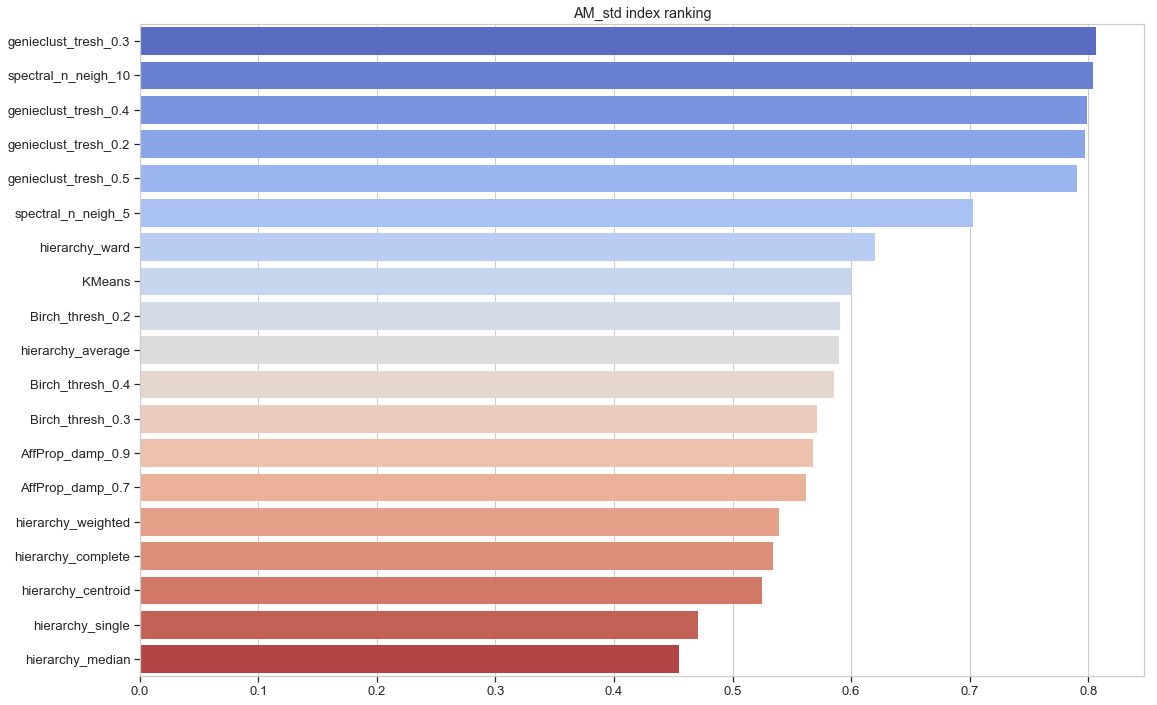

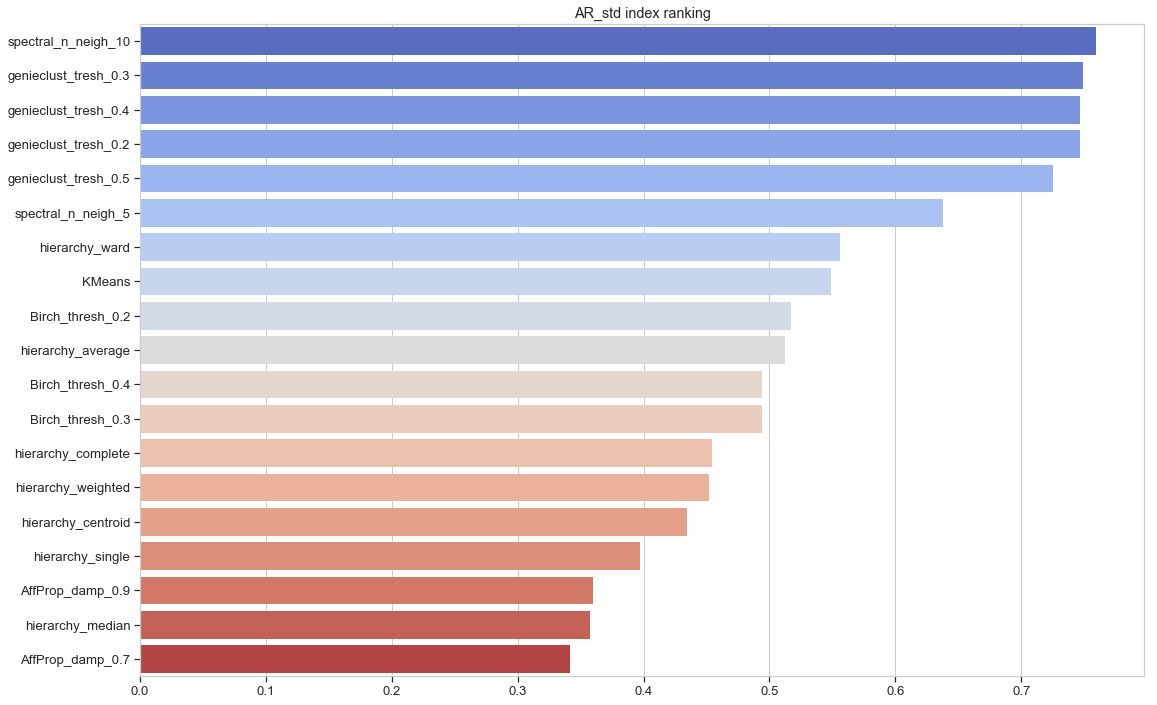

In [7]:
for index in indexes:
    sns.barplot(data=q1.sort_values(index, ascending=False), x=index, y="algorithm", palette="coolwarm", orient="h")
    plt.title(index + " index ranking")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

---

## 3. Mapy ciepła zbiór-algorytm dla poszczególnych indesów

In [8]:
bench_sets = list(results.loc[:, "benchmark_set"].drop_duplicates())
algorithms = list(results.loc[:, "algorithm"].drop_duplicates())

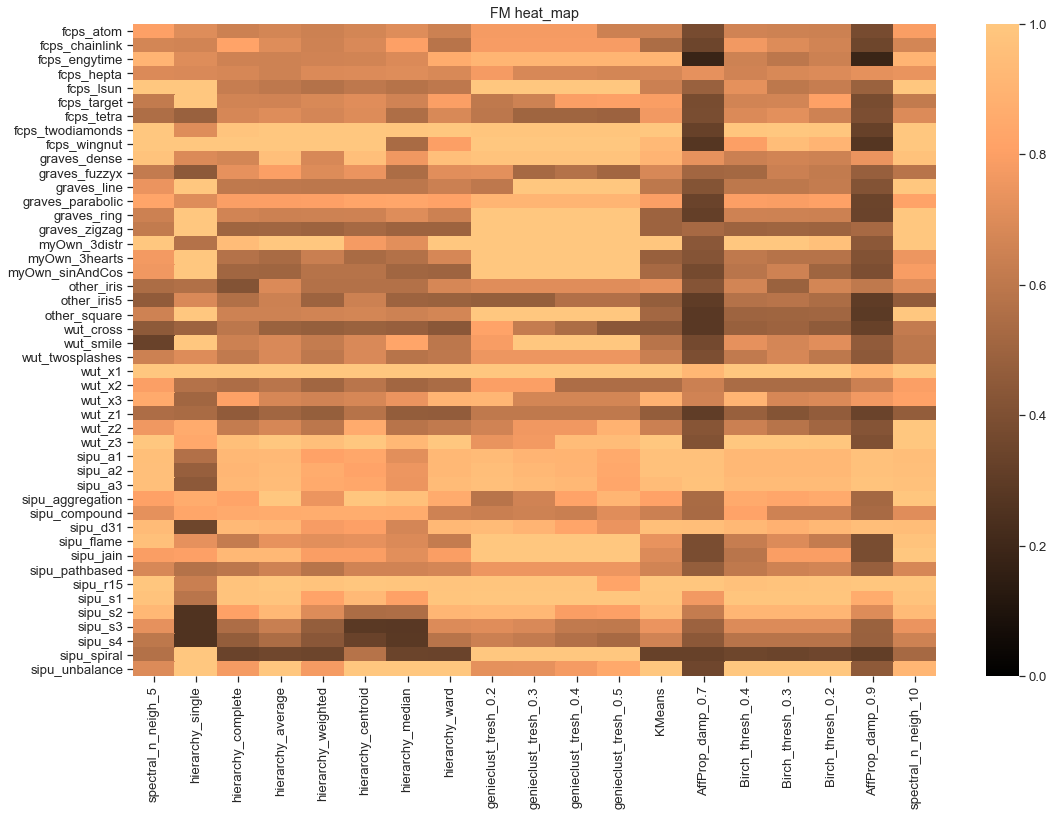

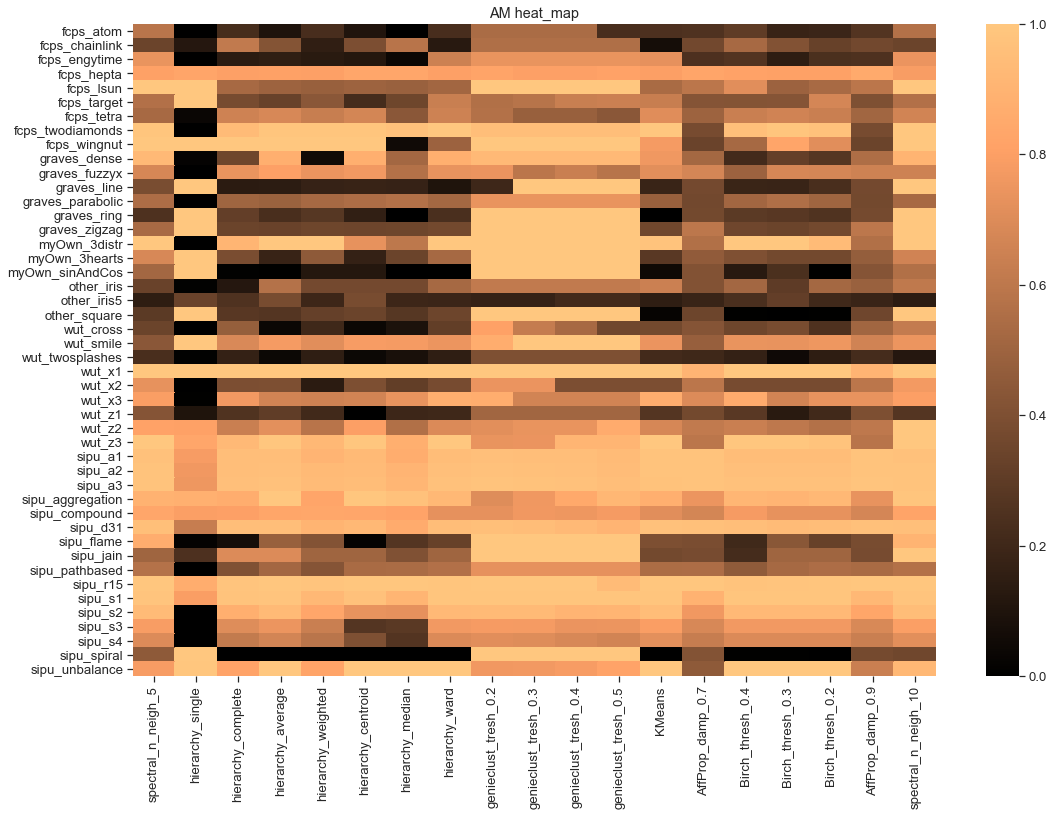

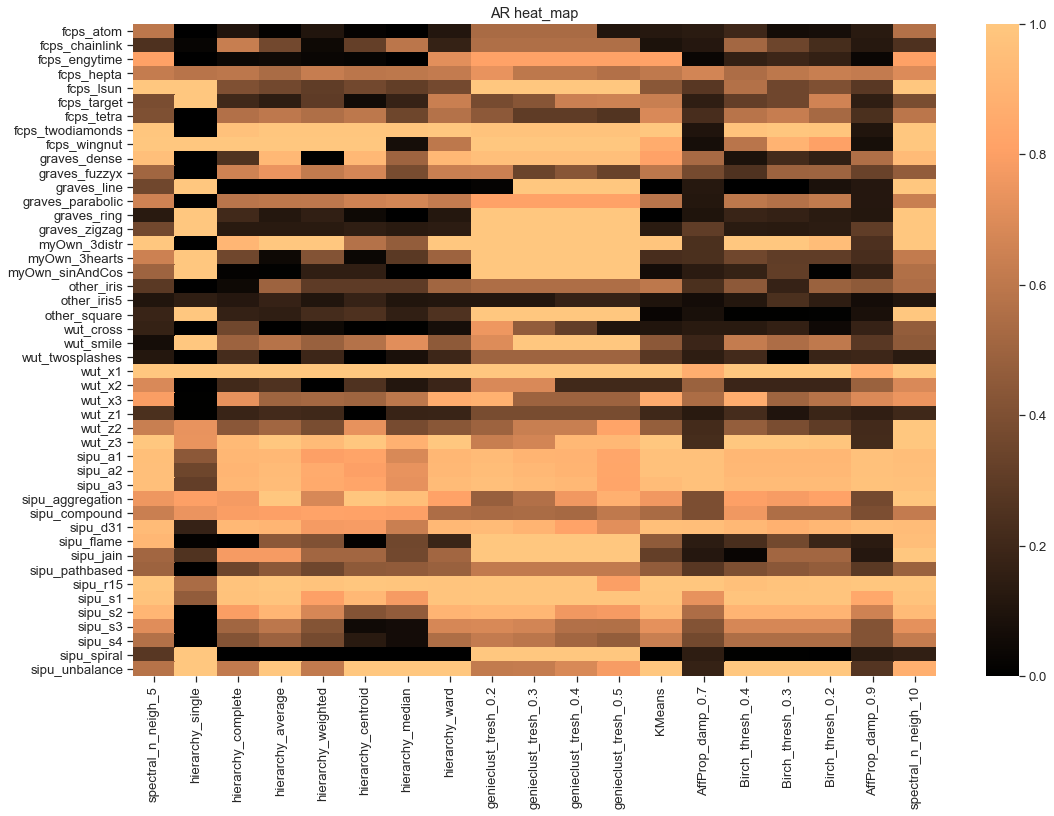

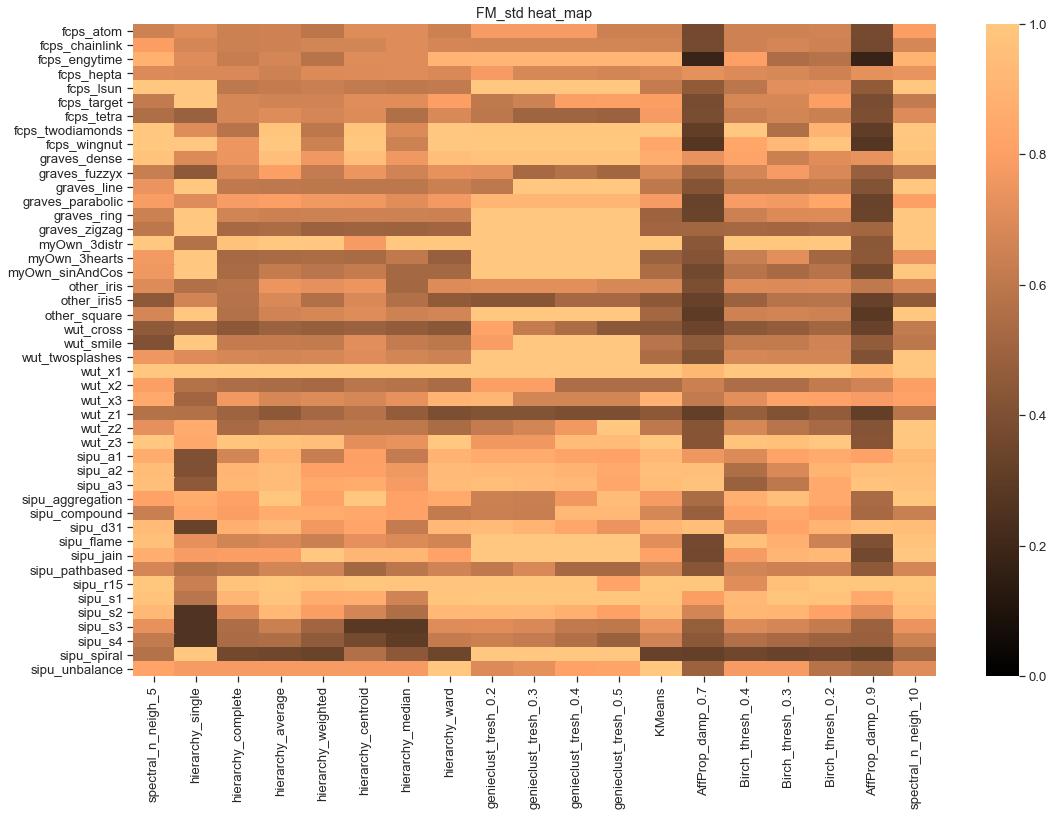

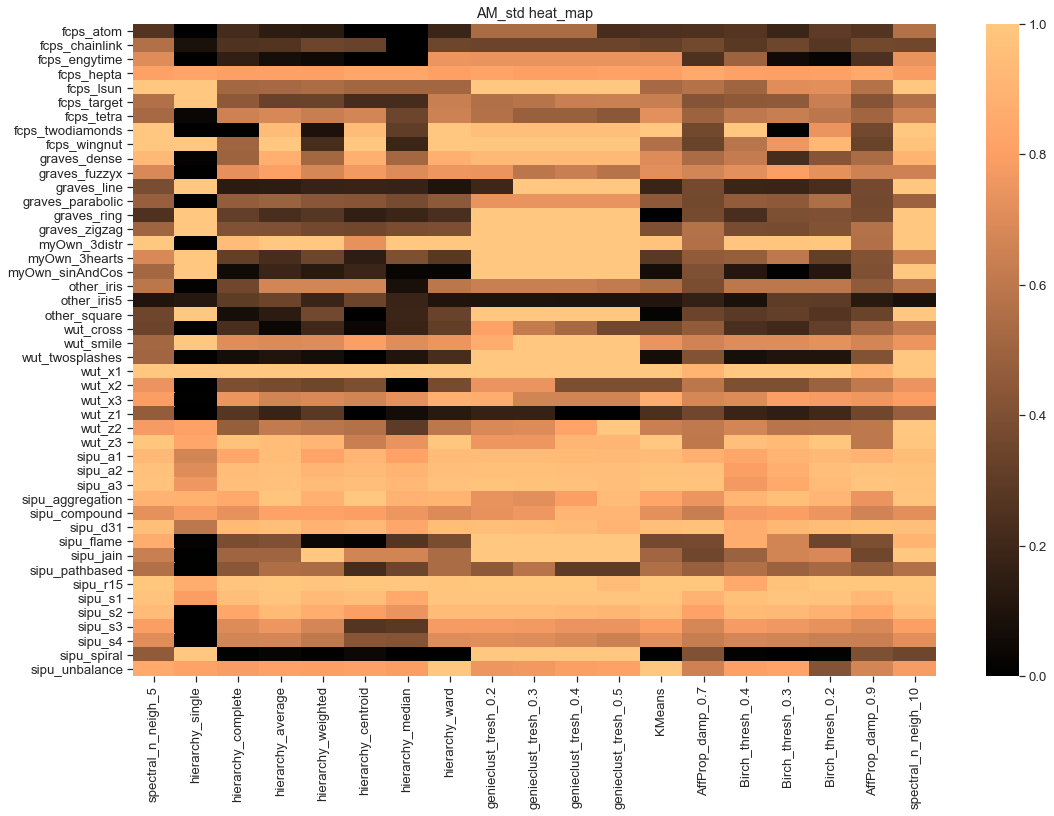

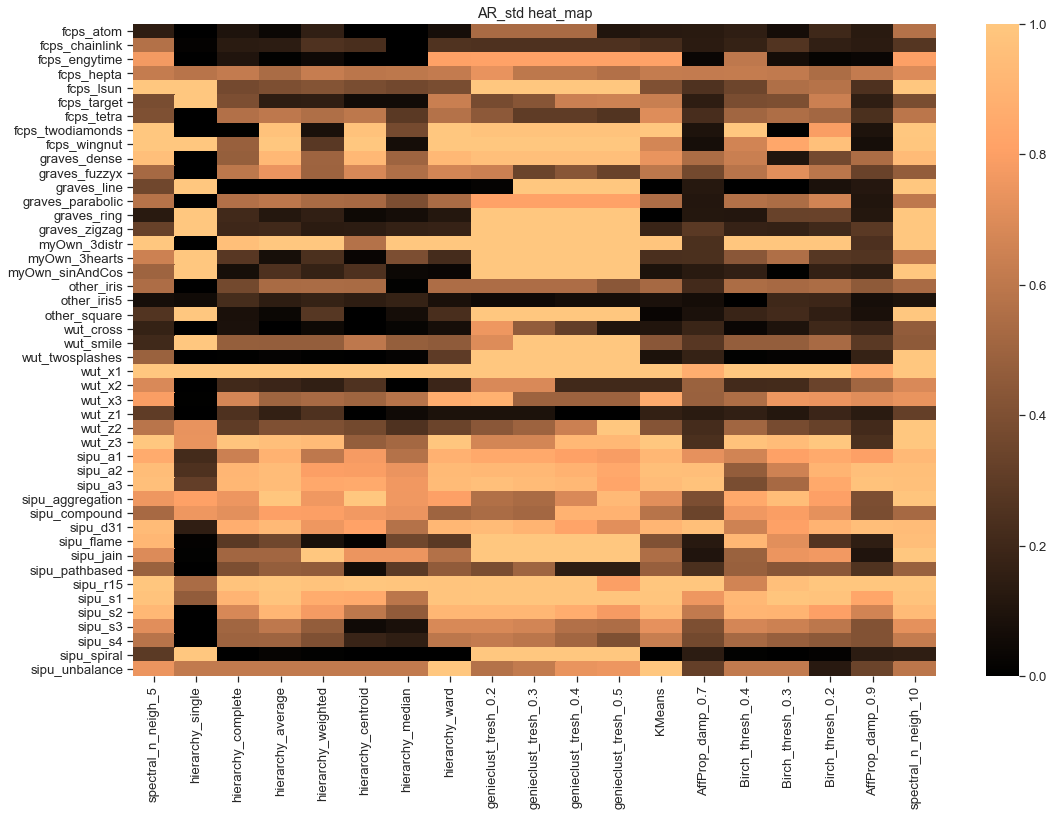

In [9]:
for index in indexes:
    fm_df = pd.DataFrame(index=bench_sets, columns=algorithms, dtype=np.float)
    for bench_set in bench_sets:
        for algorithm in algorithms:
            fm_df.loc[bench_set, algorithm] = float(results.loc[results.algorithm==algorithm].loc[results.benchmark_set==bench_set].loc[:, index])
    sns.heatmap(data=fm_df, vmin=0, vmax=1, cmap="copper")
    plt.title(index + " heat_map")
    plt.show()

---

## 4. Wpływ standaryzacji zmiennych

Wykresy poniżej prezentują różnicę pomiędzy wartością indeksu uzyskaną dla danych ustandaryzowanych, a wartością indeksu dla danysh surowych.

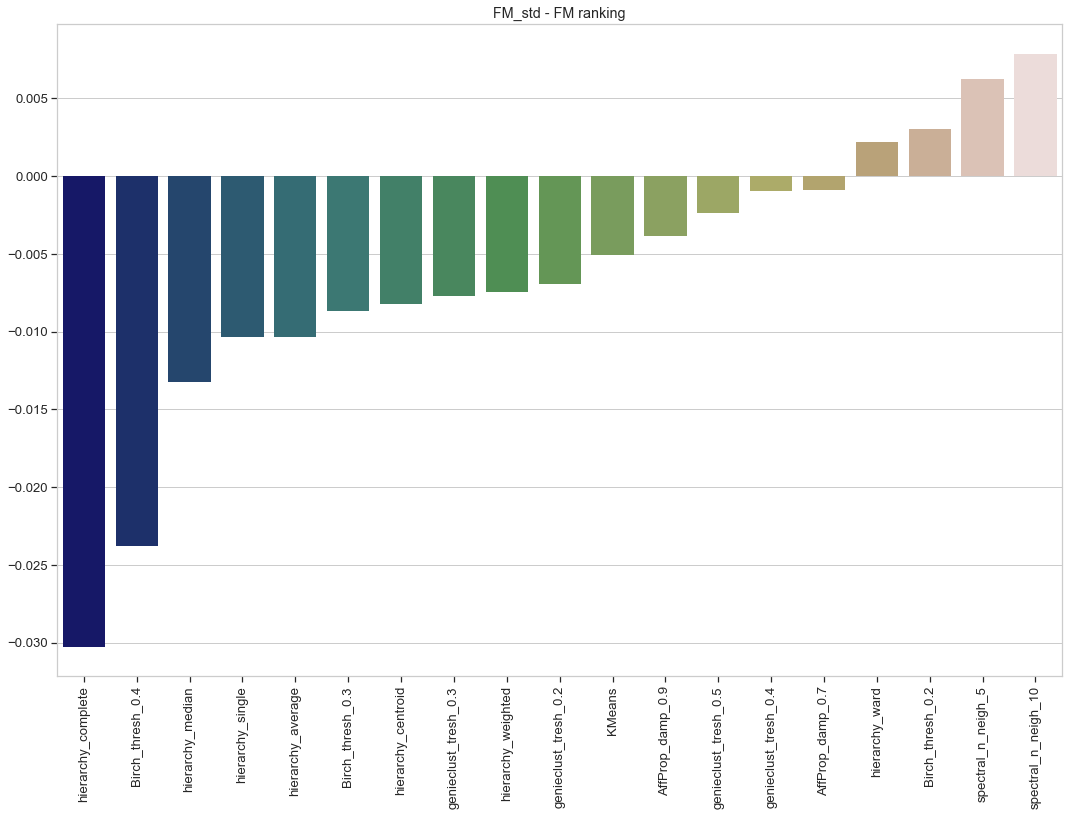

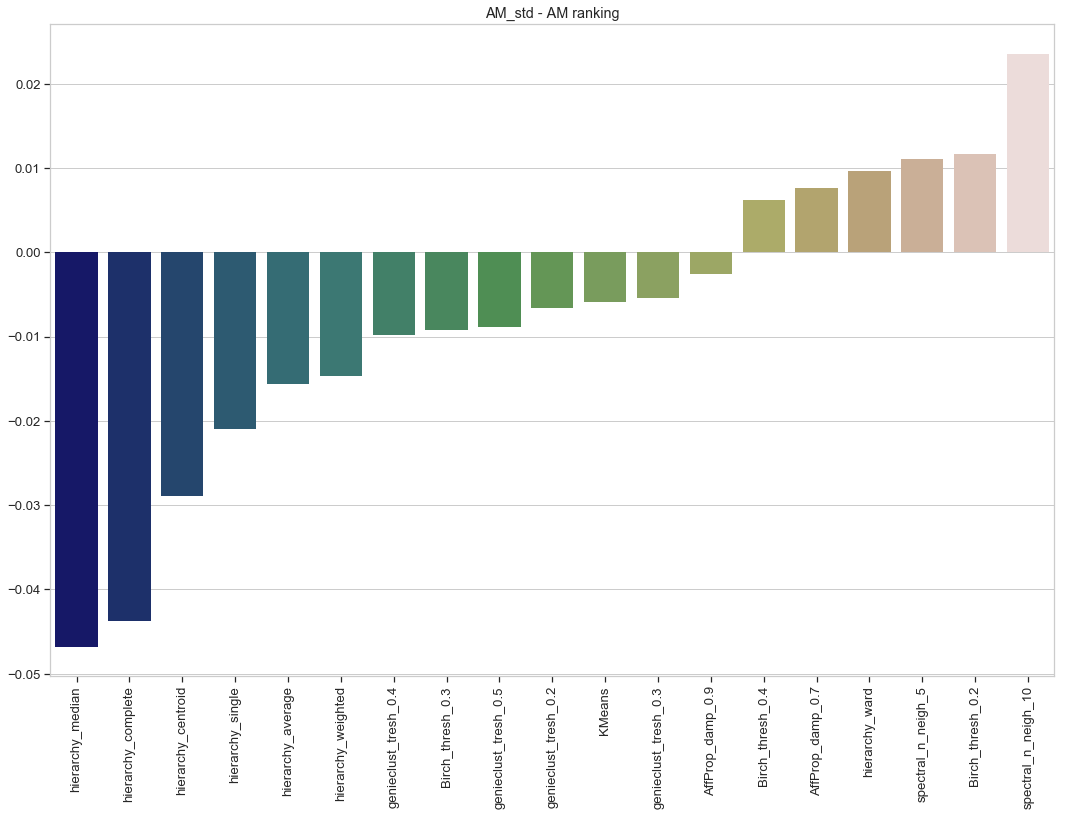

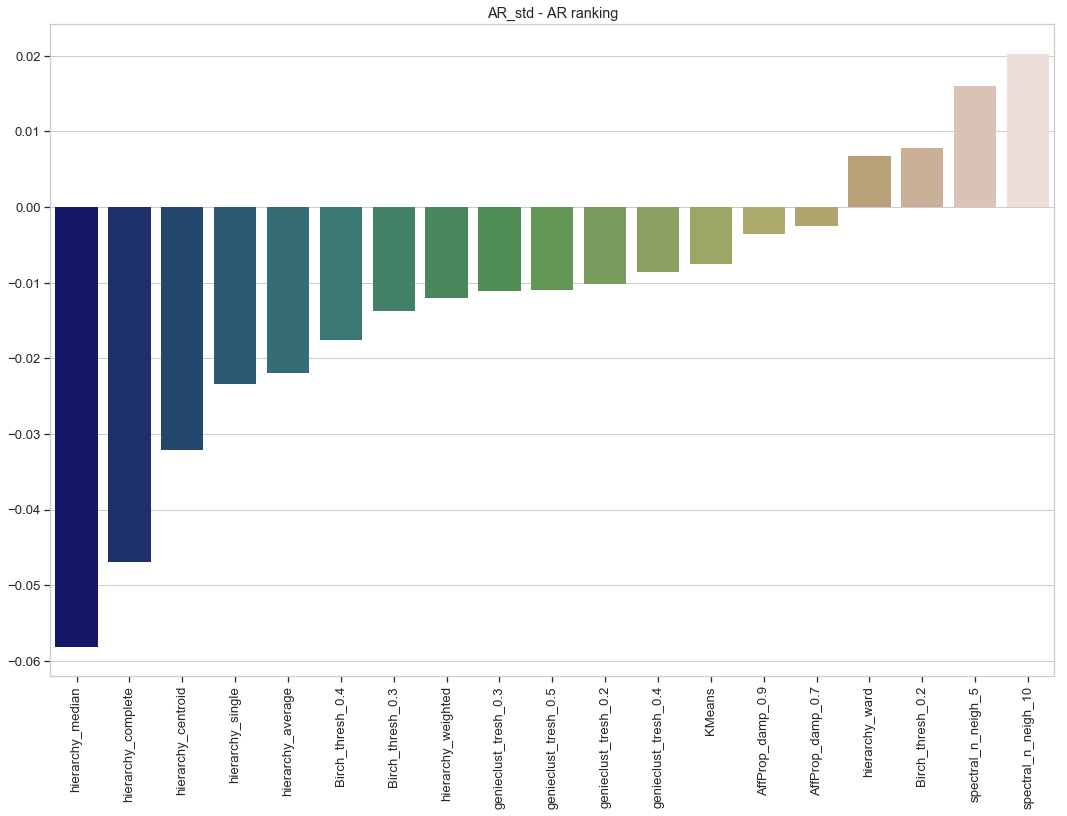

In [10]:
indexes = ["FM", "AM", "AR"]
q2 = q1
for index in indexes:
    q2.loc[:, "diff_"+index] = q1.loc[:, index+"_std"] - q1.loc[:, index]
    sns.barplot(data=q2.sort_values("diff_"+index), x="algorithm", y="diff_"+index, palette="gist_earth")
    locs, labels = plt.xticks()
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title(index + "_std - " + index + " ranking")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()